In [1]:
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
wandb.init(project="audio")
config = wandb.config

config.max_len = 100
config.buckets = 20

# Save data to array file first
#save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

labels=["andre", "busquet", "emanuel", 'guilherme']

In [3]:
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

In [4]:
# # Feature dimension
channels = 1
config.epochs = 6500
config.batch_size = 100

num_classes = 4

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)

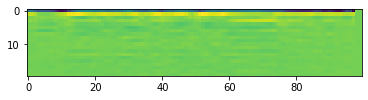

In [5]:
plt.imshow(X_train[100, :, :, 0])

In [6]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [7]:

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)

#multi layer perceptron
# model = Sequential()
# model.add(Flatten(input_shape=(config.buckets, config.max_len)))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss="categorical_crossentropy",
#                  optimizer="adam",
#                  metrics=['accuracy'])

#2d convolutional
# model = Sequential()
# model.add(Conv2D(32,
#          (3,3), 
#          input_shape=(config.buckets, config.max_len, channels),
#          activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32,
#          (3,3), 
#          activation='relu'))
# model.add(Dropout(0.25))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss="categorical_crossentropy",
#              optimizer="adam",
#              metrics=['accuracy'])


#LSTM
model = Sequential()
model.add(LSTM(16, input_shape=(config.buckets, config.max_len), activation="sigmoid"))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [ ]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Train on 213 samples, validate on 142 samples
Epoch 1/6500
213/213 [==============================] - 1s 6ms/step - loss: 1.5228 - accuracy: 0.0657 - val_loss: 1.4825 - val_accuracy: 0.0775
Epoch 2/6500
213/213 [==============================] - 1s 2ms/step - loss: 1.4775 - accuracy: 0.0657 - val_loss: 1.4500 - val_accuracy: 0.0775
Epoch 3/6500
213/213 [==============================] - 0s 920us/step - loss: 1.4472 - accuracy: 0.0657 - val_loss: 1.4283 - val_accuracy: 0.0775
Epoch 4/6500
213/213 [==============================] - 0s 728us/step - loss: 1.4259 - accuracy: 0.0657 - val_loss: 1.4136 - val_accuracy: 0.0775
Epoch 5/6500
213/213 [==============================] - 0s 722us/step - loss: 1.4115 - accuracy: 0.0657 - val_loss: 1.4024 - val_accuracy: 0.0775
Epoch 6/6500
213/213 [==============================] - 0s 676us/step - loss: 1.4006 - accuracy: 0.0986 - val_loss: 1.3940 - val_accuracy: 0.1831
Epoch 7/6500
213/213 [==============================] - 0s 1ms/step - loss: 1.3928

In [ ]:


##Testar o modelo:
# audio = wav2mfcc('./data/andre/PTT-20191027-WA0016.wav')
# audio
# # audio.reshape(audio.shape[0], config.buckets, config.max_len)
# score = model.evaluate(X_train, y_train_hot, batch_size=config.batch_size)
# score
#y_test_hot

#to_categorical(y_test)
# X_train[1]
# audio


# build model
#model = Sequential()
#model.add(LSTM(16, input_shape=(config.buckets, config.max_len, channels), activation="sigmoid"))
#model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

# labels=["andre"]

# X_train, X_test, y_train, y_test = get_train_test()

In [ ]:
# model.compile(loss="categorical_crossentropy",
#                   optimizer="adam",
#                   metrics=['accuracy'])

In [ ]:
# wandb.init()
# model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])